# 4  การทดลอง
## 4.1 สัญญาณแถบผ่าน

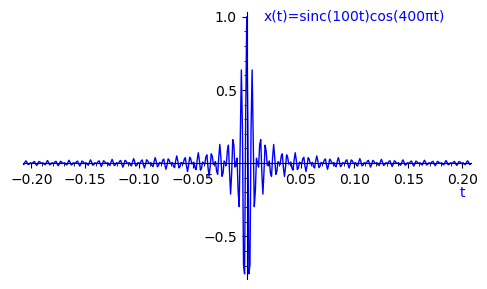

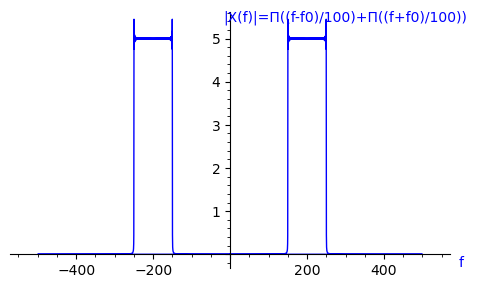

In [1]:
# bandpass signal x(t)
# and its magnitude spectrum
import numpy as np
from scipy.fftpack import fft, ifft

f0=200 #center freq
duration = 4.0
fs = 1000.0

# number of samples/duration
samples = int(fs*duration)
t = -2+np.arange(samples)/fs #arange is used to construct array [0...samples-1]
x = (np.sinc(100*t))*np.cos(2*np.pi*f0*t) # discrete bandpass signal
lt=np.array(t).tolist() #convert array t to list
lx=np.array(x).tolist() #convert array x to list
Px=list_plot(list(zip(lt,lx)),plotjoined=true,figsize=(5,3),xmin=-0.2,xmax=0.2)
P1=text("t",(0.2,-0.2))
P2=text("x(t)=sinc(100t)cos(400πt)",(0.1,1))
show(Px+P1+P2)
Fx=np.fft.fft(x) # Fast Fourier Transform
f=np.fft.fftfreq(len(t),1/fs) #Compute Discrete Fourier Transform sample frequencies
magx=np.abs(Fx)
lmagx=np.array(magx).tolist()
lf=np.array(f).tolist()
Mx=list_plot(list(zip(lf,lmagx)),plotjoined=true,figsize=(5,3),xmin=-550,xmax=550)
M1=text("f",(600,-0.2))
M2=text("|X(f)|=Π((f-f0)/100)+Π((f+f0)/100))",(300,5.5))
show(Mx+M1+M2)

## 4.2 สัญญาณผ่านต่ำด้วยวิธีการวิเคราะห์

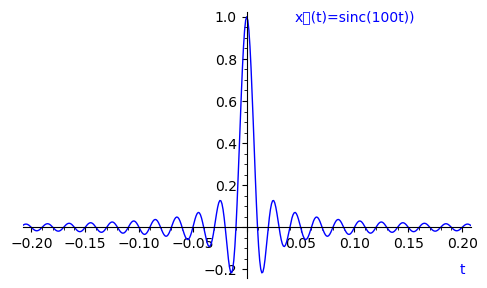

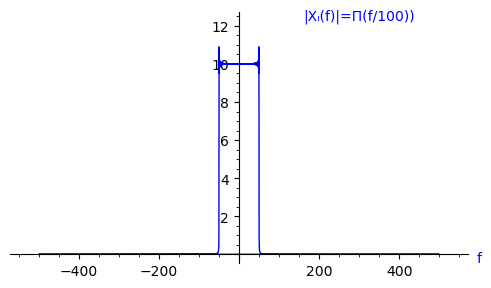

In [2]:
# lowpass signal xl(t) by analytic
# and its magnitude spectrum
reset()
import numpy as np
from scipy.fftpack import fft, ifft
f0=200 #center freq
duration = 4.0
fs = 1000.0
# number of samples/duration
samples = int(fs*duration)
t = -2+np.arange(samples)/fs #arange is used to construct array [0...samples-1]
x = (np.sinc(100*t)) # discrete lowpass signal
lt=np.array(t).tolist() #convert array t to list
lx=np.array(x).tolist() #convert array x to list
Px=list_plot(list(zip(lt,lx)),plotjoined=true,figsize=(5,3),xmin=-0.2,xmax=0.2)
P1=text("t",(0.2,-0.2))
P2=text("x￿(t)=sinc(100t))",(0.1,1))
show(Px+P1+P2)
Fx=np.fft.fft(x) # Fast Fourier Transform
f=np.fft.fftfreq(len(t),1/fs) #Compute Discrete Fourier Transform sample frequencies
magx=np.abs(Fx)
lmagx=np.array(magx).tolist()
lf=np.array(f).tolist()
Mx=list_plot(list(zip(lf,lmagx)),plotjoined=true,figsize=(5,3),xmin=-550,xmax=550)
M1=text("f",(600,-0.2))
M2=text("|Xₗ(f)|=Π(f/100))",(300,12.5))
show(Mx+M1+M2)

## 4.3 สัญญาณผ่านต่ำด้วยวิธีการเชิงตัวเลข

In [3]:
# Returns the lowpass equivalent of the signal x
# f0 is the center frequency
reset()
def loweq(x,t,f0):
    z=hilbert(x) # compute analytic signal, z(t)=x(t)+ix^(t)
    xl=z*np.exp(-i*2*pi*f0*t)
    return xl

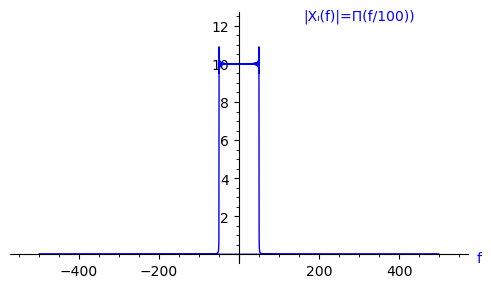

In [4]:
# lowpass signal xl(t) by numerical computation
# and its magnitude spectrum
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft
f0 = 200 #center freq
duration = 4.0
fs = 1000.0 # number of samples/duration
samples = int(fs*duration)
t = -2+np.arange(samples)/fs #arange is used to construct array [0...samples-1]
x = (np.sinc(100*t))*np.cos(2*np.pi*f0*t) # discrete bandpass signal
xl=loweq(x,t,f0)
Fx = np. fft.fft(xl) # Fast Fourier Transform
f = np.fft.fftfreq(len(t),1/fs) #Compute Discrete Fourier Transform sample frequencies
magx=np.abs(Fx)
lmagx=np.array(magx).tolist()
lf=np.array(f).tolist()
Mx=list_plot(list(zip(lf,lmagx)),plotjoined=true,figsize=(5,3),xmin=-550,xmax=550)
M1=text("f",(600,-0.2))
M2=text("|Xₗ(f)|=Π(f/100))",(300,12.5))
show(Mx+M1+M2)

# 4.4 สัญญาณอินเฟสและเอนเวโลป

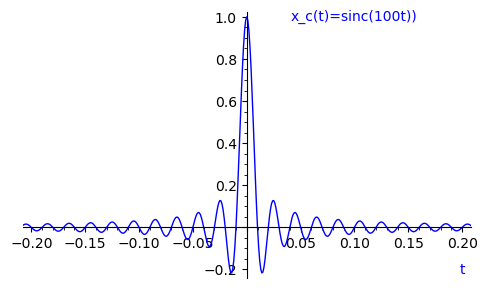

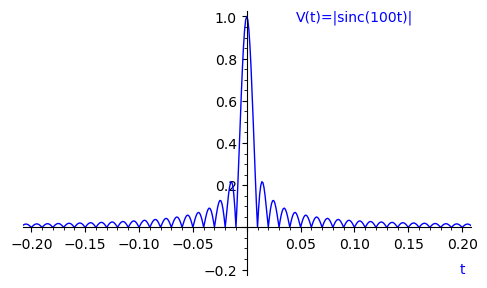

In [5]:
# In-phase component x_s(t) of x_l(t) and envelope V(t) of x(t)
# by analytic
# Returns the lowpass equivalent of the signal x
# f0 is the center frequency
reset()
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, ifft
f0=200 #center freq
duration = 4.0
fs = 1000.0
# number of samples/duration
samples = int(fs*duration)
t = -2+np.arange(samples)/fs #arange is used to construct array [0...samples-1]
xl = np.sinc(100*t) # discrete lowpass signal
xc=xl
# discrete inphase component of lowpass signal
v=np.abs(xc)
# discrete envelope of signal x(t)
lxc=np.array(xc).tolist()
lt=np.array(t).tolist()
lv=np.array(v).tolist()
Pxc=list_plot(list(zip(lt,lxc)),plotjoined=true,figsize=(5,3),xmin=-0.2,xmax=0.2)
P1=text("t",(0.2,-0.2))
P2=text("x_c(t)=sinc(100t))",(0.1,1))
show(Pxc+P1+P2)
Mv=list_plot(list(zip(lt,lv)),plotjoined=true,figsize=(5,3),xmin=-0.2,xmax=0.2)
M1=text("t",(0.2,-0.2))
M2=text("V(t)=|sinc(100t)|",(0.1,1))
show(Mv+M1+M2)